# Strategy Comparison Analysis

This notebook compares the performance of different trading strategies on S&P 500 data.


In [11]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import strategies
import engine
import priceloader

priceloader.PriceLoader().download_data()
price_data = (
    priceloader.PriceLoader().load_data().dropna(axis=1).loc["2005-01-01":"2025-01-01", :]
)

strats = [
    strategies.BenchmarkStrategy,
    strategies.RSIStrategy,
    strategies.MACDStrategy,
    strategies.MovingAverageStrategy,
    strategies.VolatilityBreakoutStrategy,
]

results = {}

for strat in strats:
    try:
        s = strat()
        eng = engine.Engine(s)
        eng.run(price_data)
        report = eng.get_report()
        results[strat.__name__] = {
            "report": report,
            "engine": eng,
            "strategy": s,
        }

    except Exception as e:
        print(f"Error running {strat.__name__}: {e}")
        continue



/Users/scotthanna/Desktop/CFFIP/finm32500/assignment2/priceloader/priceloader.py:69: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed
/Users/scotthanna/Desktop/CFFIP/finm32500/assignment2/priceloader/priceloader.py:69: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=self.start_date, end=self.end_date)
[*********************100%***********************]  1 of 1 completed


results for BenchmarkStrategy


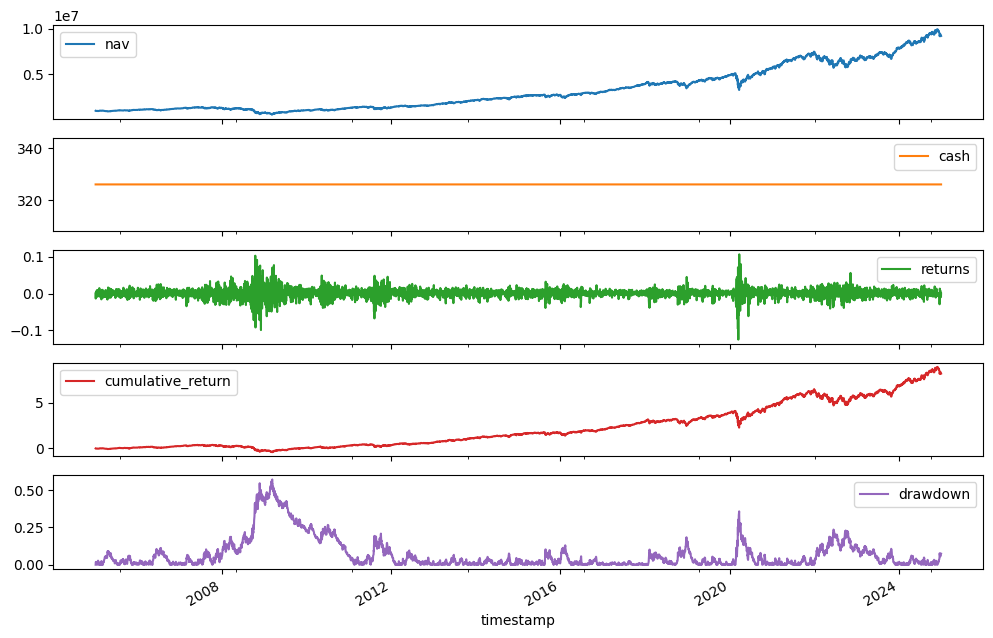

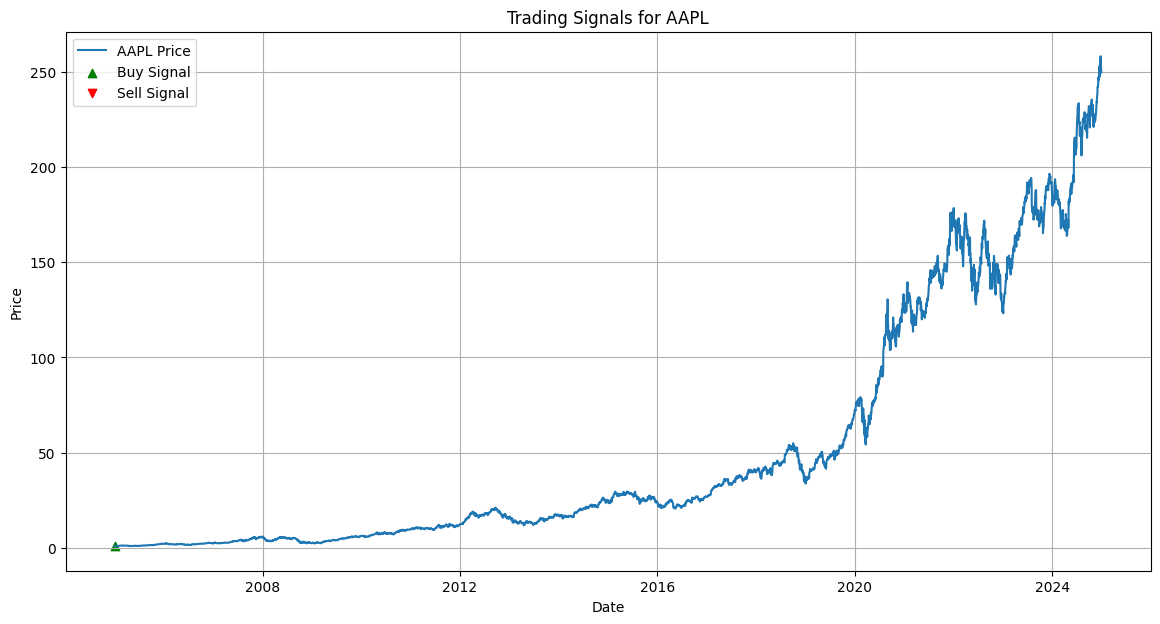

Annualized Return %: 11.74878296477222
Annualized Volatility: 19.68069436735871
Sharpe Ratio: 0.4953475107535332


results for RSIStrategy


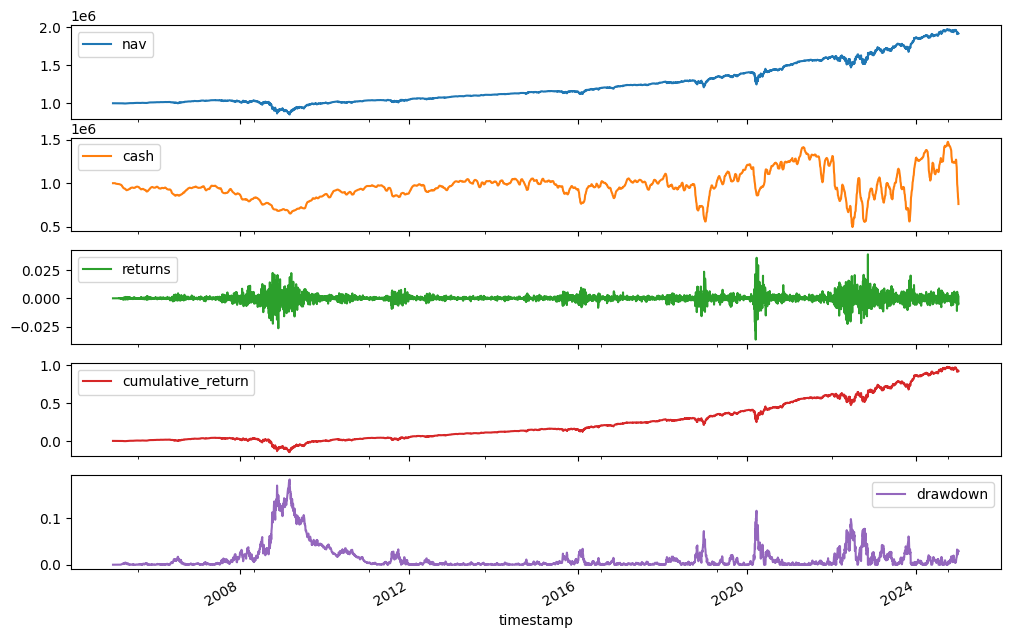

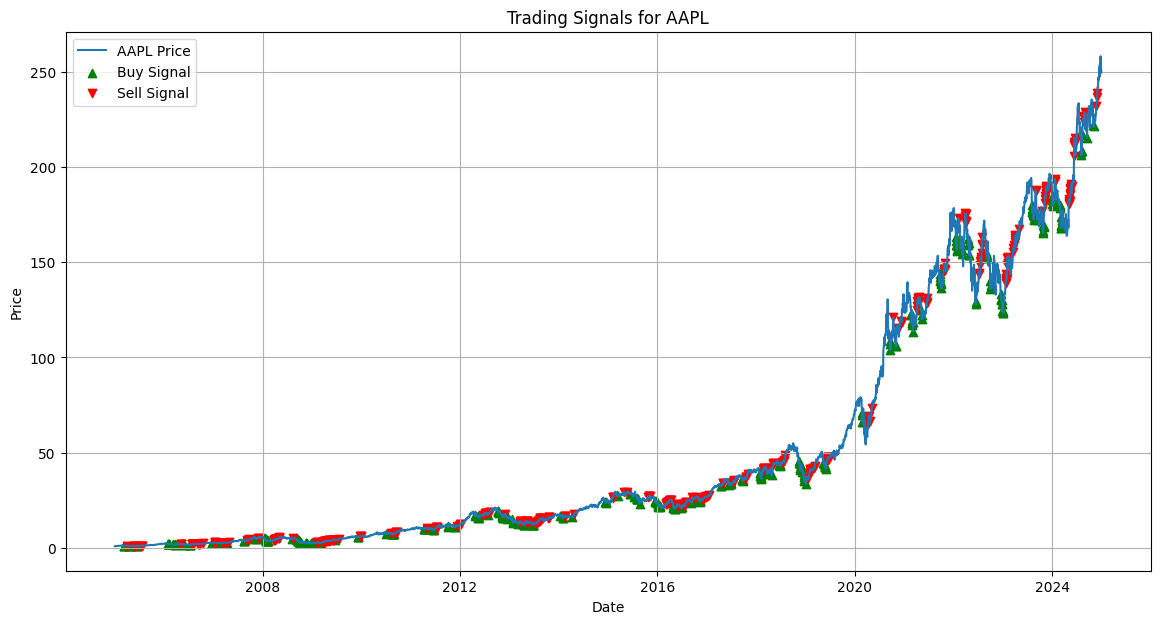

Annualized Return %: 3.3131586532461954
Annualized Volatility: 5.801899021434047
Sharpe Ratio: 0.22633255911469205


results for MACDStrategy


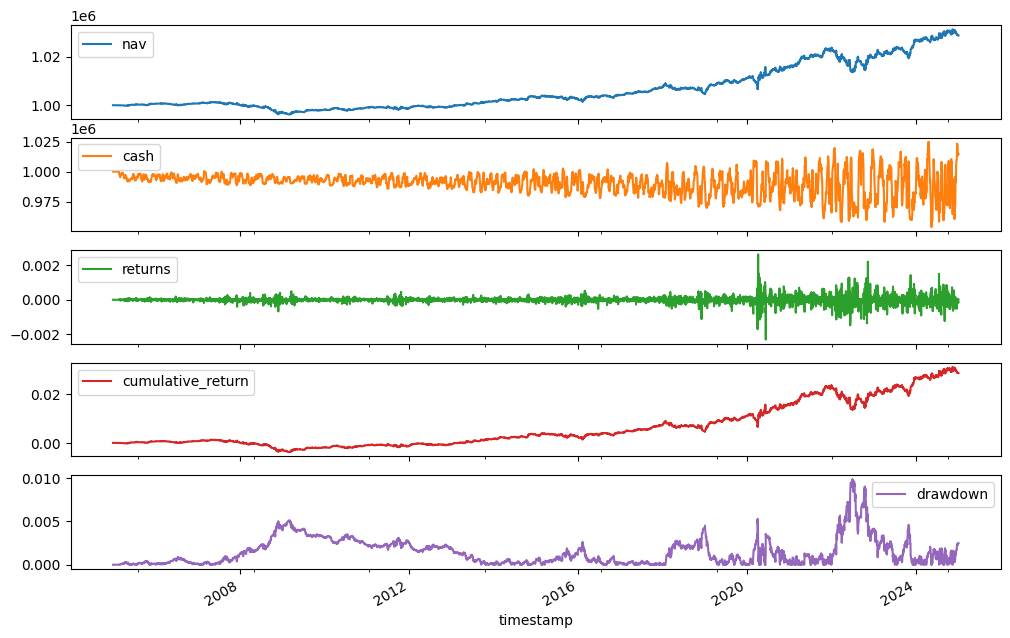

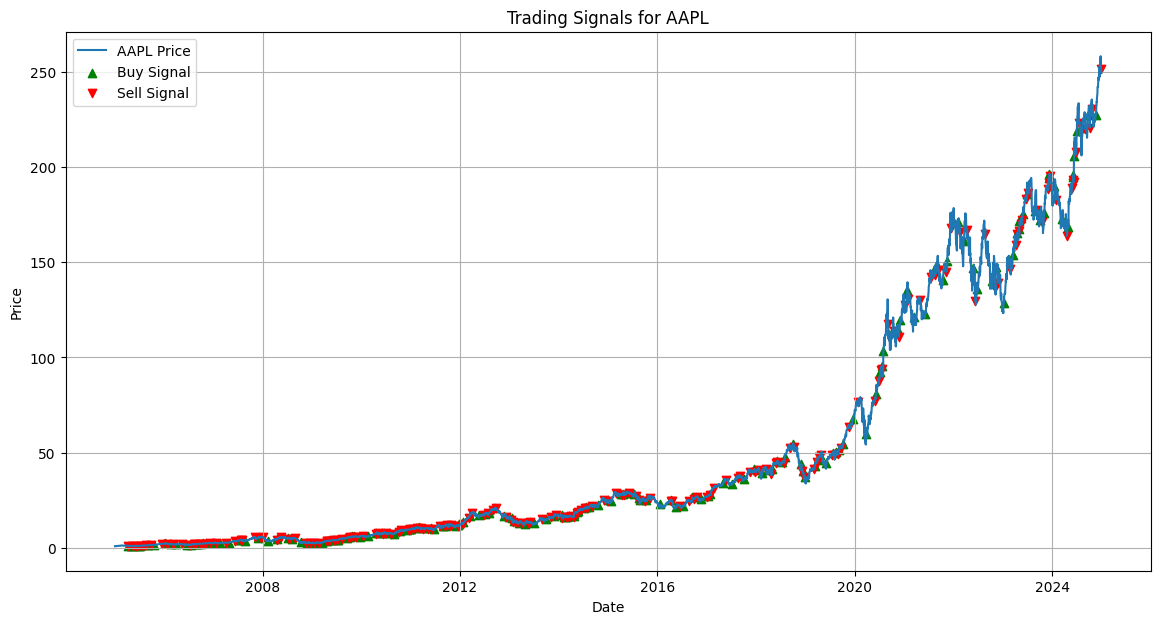

Annualized Return %: 0.141533537141858
Annualized Volatility: 0.3203110764025736
Sharpe Ratio: -5.802067426860952


results for MovingAverageStrategy


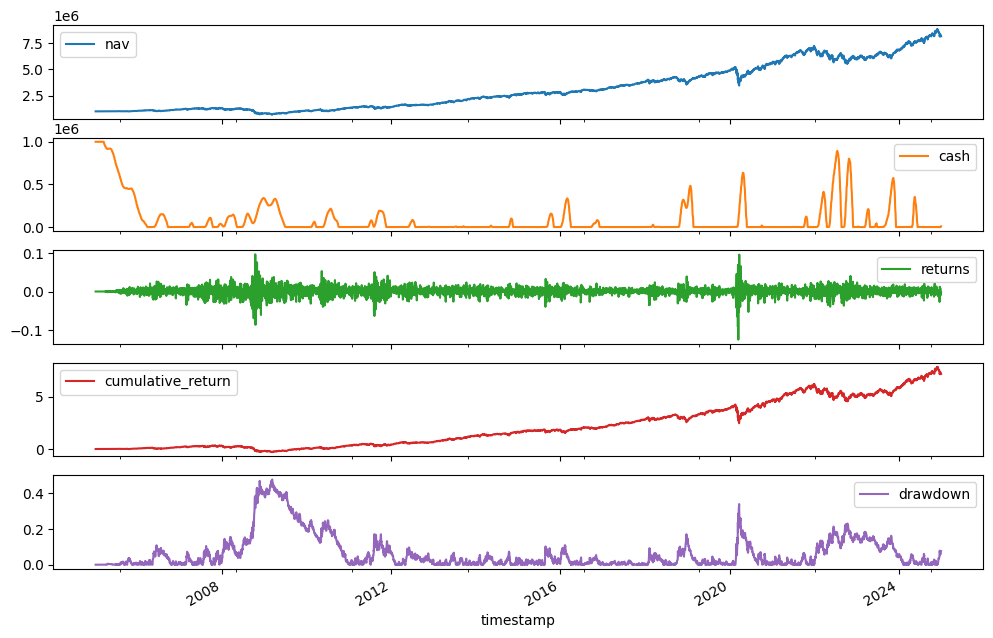

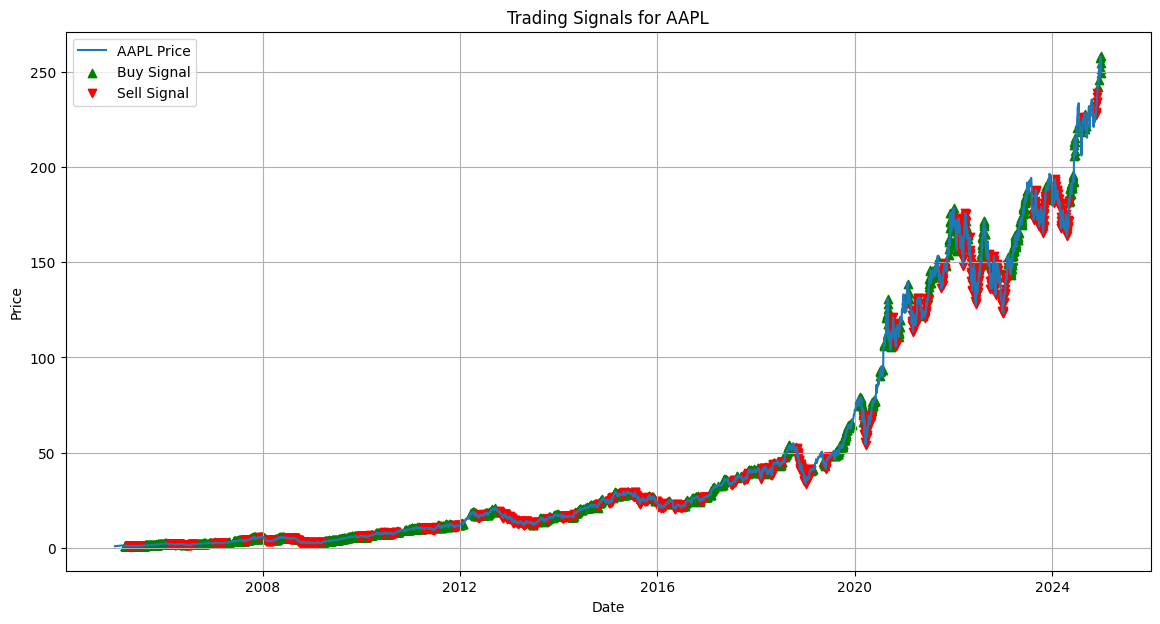

Annualized Return %: 11.077138424497758
Annualized Volatility: 17.297556091802665
Sharpe Ratio: 0.5247642138763998


results for VolatilityBreakoutStrategy


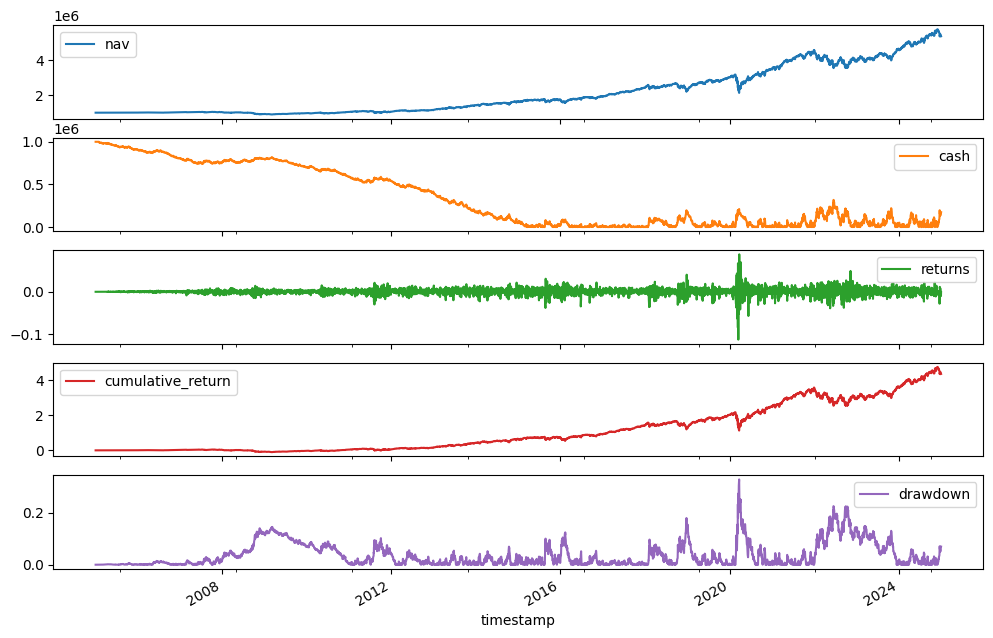

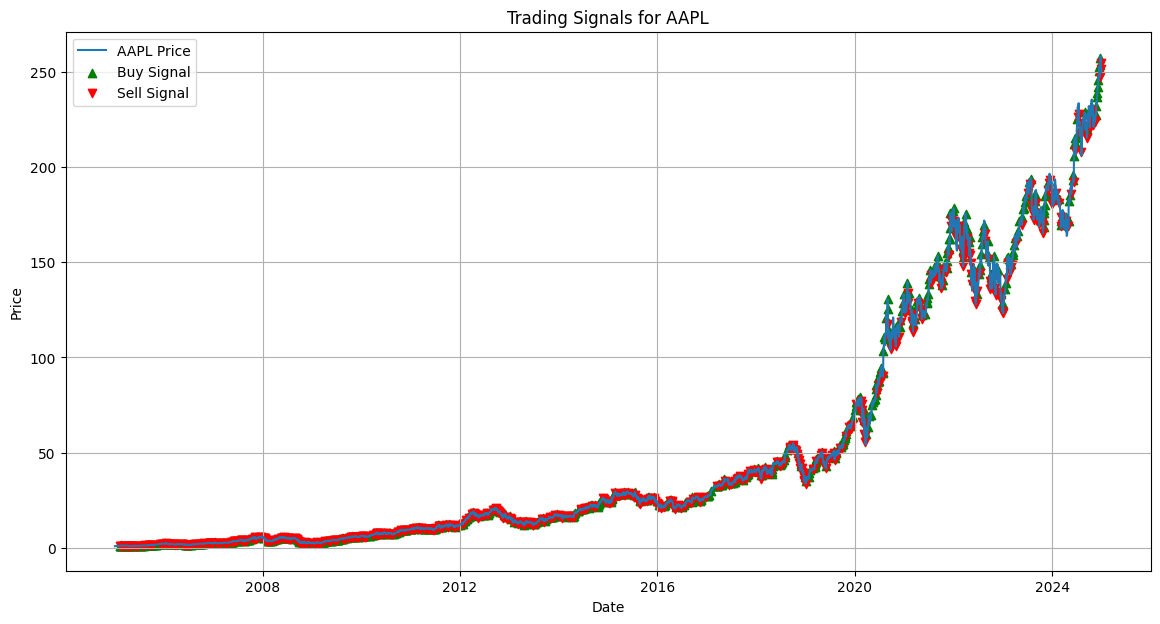

Annualized Return %: 8.757484801877036
Annualized Volatility: 12.675747638351226
Sharpe Ratio: 0.5331034503583729




In [13]:
for nam, val in results.items():
    print(f"results for {nam}")
    val["report"].plot_performance()
    val["report"].plot_signals("AAPL")
    print(f"Annualized Return %:",val["report"].get_performance_metrics()["annualized_return_pct"])
    print(f"Annualized Volatility:", val["report"].get_performance_metrics()["annualized_volatility_pct"])
    print(f"Sharpe Ratio:",val["report"].get_performance_metrics()["sharpe_ratio"])
    print()
    print()

In [14]:
for nam, val in results.items():
    print(f"results for {nam}")
    print(f"Total Return over {len(price_data)/252:.2f} years %:",val["report"].get_performance_metrics()["total_return_pct"])
    print()
     

results for BenchmarkStrategy
Total Return over 19.97 years %: 819.4242673201561

results for RSIStrategy
Total Return over 19.97 years %: 91.74302801941185

results for MACDStrategy
Total Return over 19.97 years %: 2.8650148694858046

results for MovingAverageStrategy
Total Return over 19.97 years %: 715.128927504973

results for VolatilityBreakoutStrategy
Total Return over 19.97 years %: 434.77408171276596



/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_26723/1935008863.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(navs.keys(), rotation=45)
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_26723/1935008863.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(sharpes.keys(), rotation=45)
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_26723/1935008863.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(trades.keys(), rotation=45)
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_26723/1935008863.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

[Text(0, 0, 'BenchmarkStrategy'),
 Text(1, 0, 'RSIStrategy'),
 Text(2, 0, 'MACDStrategy'),
 Text(3, 0, 'MovingAverageStrategy'),
 Text(4, 0, 'VolatilityBreakoutStrategy')]

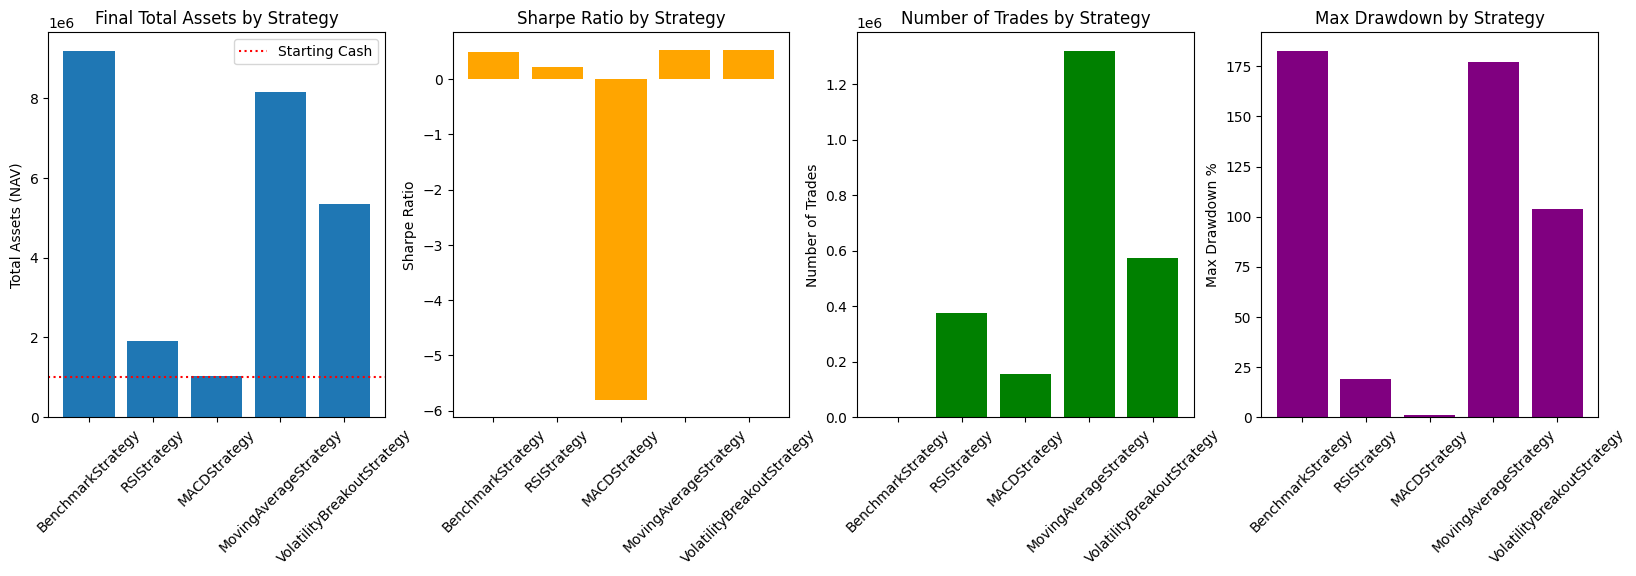

In [15]:
navs = {name: result["report"].get_performance_metrics()["total assets"] for name, result in results.items()}

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].bar(navs.keys(), navs.values())
ax[0].axhline(1000000, color='red', linestyle=':', label="Starting Cash")
ax[0].set_ylabel("Total Assets (NAV)")
ax[0].set_title("Final Total Assets by Strategy")
ax[0].legend()
ax[0].set_xticklabels(navs.keys(), rotation=45)

sharpes = {name: result["report"].get_performance_metrics()["sharpe_ratio"] for name, result in results.items()}

ax[1].bar(sharpes.keys(), sharpes.values(), color='orange')
ax[1].set_ylabel("Sharpe Ratio")
ax[1].set_title("Sharpe Ratio by Strategy")
ax[1].set_xticklabels(sharpes.keys(), rotation=45)

# number of trades
trades = {name: result["report"].get_performance_metrics()["total_trades"] for name, result in results.items()}

ax[2].bar(trades.keys(), trades.values(), color='green')
ax[2].set_ylabel("Number of Trades")
ax[2].set_title("Number of Trades by Strategy")
ax[2].set_xticklabels(trades.keys(), rotation=45)

max_drawdowns = {name: result["report"].get_performance_metrics()["max_drawdown_pct"] for name, result in results.items()}
ax[3].bar(max_drawdowns.keys(), max_drawdowns.values(), color='purple')
ax[3].set_ylabel("Max Drawdown %")
ax[3].set_title("Max Drawdown by Strategy")
ax[3].set_xticklabels(max_drawdowns.keys(), rotation=45)


## Signal Behavior, Execution Constraints, and Performance

### Signal Behavior

- **Benchmark Strategy**: This strategy simply buys and holds an equal number of shares of each asset from the start to the end of the period. It does not generate any trading signals after the initial purchase.
- **RSI Strategy**: This strategy generates BUY signals when the RSI drops below 30 and SELL signals when it rises above 70. In terms of frequency, it generates signals moderately often, slowly entering and exiting positions.
- **MACD Strategy**: This strategy generates BUY signals when the MACD line crosses above the signal line and SELL signals when it crosses below. It generated the least signals (excluding the benchmark), as it only generated signals on crossover days.
- **Moving Average Strategy**: This strategy generates BUY signals when the short-term moving average is above the long-term moving average and SELL signals when it is below. It generates signals much more frequently since we had signals be generated while above or below, not just on crossovers.

- **Volatility Breakout Strategy**: This strategy generates BUY signals when the returns exceed the 20-day rolling standard deviation and SELL signals when they fall below the negative of that value. It also generated a moderate number of signals (about as often as the RSI strategy)

Most of the strategies tended to buy more often than they sold, likely due to the overall upward trend in the market during this period.

### Execution Constraints

The main idiosyncratic constraint was on MACD strategy, which could only execute trades on days when a crossover occurred. This meant that it could not go long more than one share of each asset at a given time, as it would have to wait for a crossover to sell before it could buy again. This likely limited its ability to capitalize on trends in the market.

A general constraint across all strategies was the inability to short sell or use leverage, which limited the ability to capitalize on downward trends.

### Performance Comparison

Unsurprisingly, the highest returns are generated by the benchmark strategy, which simply bought and held an equal number of shares of each asset at the start of the period until the end. However, the volatility breakout and moving average strategies actually had marginally higher Sharpe ratios, indicating higher risk-adjusted returns. The performance of RSI was mediocre, while MACD was terrible due to constraints on trading volume and execution.
